In [5]:
    # jupyter 
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))


# initialise
%matplotlib inline

import numpy as np
#import theano
import scipy.io
from keras.utils import np_utils
from matplotlib import pyplot as plt

#from keras.models import Sequential
from keras import layers
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
#from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import MaxPooling2D

from keras.layers import Input, concatenate, Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers import Input, merge, Conv2D, UpSampling2D
from keras.optimizers import Adam, sgd
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
#from keras import losses
from keras import backend as K
from keras.models import load_model

THEANO_FLAGS='floatX=float32, exception_verbosity=high'


# load data---------------------------------------------------------------
w,h = 28,28

# x_load_0 = scipy.io.loadmat('x__10000x28x28.mat')   #dict
# y_load_0 = scipy.io.loadmat('y__10000x28x28.mat')
# x_load = x_load_0['x_vals2']
# y_load = y_load_0['y_vals2']

# x_load_0 = scipy.io.loadmat('input8_from_10k.mat')   #dict
# y_load_0 = scipy.io.loadmat('det8_from_10k.mat')
# x_load_1 = x_load_0['input8']
# y_load_1 = y_load_0['det8']
    
x_load_0 = scipy.io.loadmat('input8ck.mat')   #dict
y_load_0 = scipy.io.loadmat('det8ck.mat')

x_load_1 = x_load_0['input8ck']
y_load_1 = y_load_0['det8ck']


    
x_load = np.expand_dims(x_load_1, 3)
y_load = np.expand_dims(y_load_1, 3)
print('y_load:', y_load.shape)
print('x_load:', x_load.shape)

#full dataset
x_train = x_load[:-2000] # first 8k out of 10k
y_train = y_load[:-2000]

x_test = x_load[-2000:] # last 2k
y_test = y_load[-2000:]
print('\n')
print('x_train:', x_train.shape)
print('x_test: ', x_test.shape)

#small dataset
x_train = x_load[:800] # first 800 out of 10k
y_train = y_load[:800]

x_test = x_load[800:1000] # next 200
y_test = y_load[800:1000]
print('\nsmaller dataset:\n')
print('x_train:', x_train.shape)
print('x_test: ', x_test.shape)

#corrected dataset
x_train = x_load[:540] # first 540 out of 677
y_train = y_load[:540]

x_test = x_load[540:] # next 137
y_test = y_load[540:]
print('\nsmaller dataset:\n')
print('x_train:', x_train.shape)
print('x_test: ', x_test.shape)

# adjust type
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_test_20 = x_test[0:20]



Using Theano backend.


('y_load:', (677L, 28L, 28L, 1L))
('x_load:', (677L, 28L, 28L, 1L))


('x_train:', (0L, 28L, 28L, 1L))
('x_test: ', (677L, 28L, 28L, 1L))

smaller dataset:

('x_train:', (677L, 28L, 28L, 1L))
('x_test: ', (0L, 28L, 28L, 1L))

smaller dataset:

('x_train:', (540L, 28L, 28L, 1L))
('x_test: ', (137L, 28L, 28L, 1L))


In [6]:
inp_load_0 = scipy.io.loadmat('input8ck.mat')   #dict
det_load_0 = scipy.io.loadmat('det8ck.mat')
seg_load_0 = scipy.io.loadmat('seg8ck.mat')

inp_load = inp_load_0['input8ck'] #677
det_load = det_load_0['det8ck']
seg_load = seg_load_0['seg8ck']

inp_load = np.expand_dims(inp_load, 3)
det_load = np.expand_dims(det_load, 3)
seg_load = np.expand_dims(seg_load, 3)


inp_train = inp_load[:540] # first 540 out of 677
det_train = det_load[:540]
seg_train = seg_load[:540]

inp_test = inp_load[540:] # next 137
det_test = det_load[540:]
seg_test = seg_load[540:]

print(inp_load.shape)

(677L, 28L, 28L, 1L)


In [7]:
print(type(inp_load))

<type 'numpy.ndarray'>


## aside

In [3]:
from __future__ import print_function
from __future__ import absolute_import
from __future__ import division

%matplotlib inline

#import cv2
import numpy as np
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Cropping2D, concatenate
from keras.layers.core import Reshape, Permute
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
import matplotlib.pyplot as plt
import random

#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

#import functions
from load import load_dataset


import pylab as pl
import matplotlib.cm as cm
import numpy as np
np.random.seed(1337) # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils


In [5]:
from os import listdir
from os.path import isfile, join

mypath = 'drivemod/test/original'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

#onlyfiles.shape
# a = onlyfiles[0]
# a.shape

from PIL import Image
import glob
image_list = []
for filename in glob.glob('yourpath/*.gif'): #assuming gif
    im=Image.open(filename)
    image_list.append(im)
    
# image_list.shape
from numpy  import array
a = array(image_list)
a.shape

(0L,)

In [9]:
import os
import cv2

#h0, w0 = 512,512
h, w = 584,565

def shape_data(folder):
    images_original = [img for img in os.listdir(os.path.join(folder, "original"))]
    images_mask = [img for img in os.listdir(os.path.join(folder, "mask"))]
    #images_box = [img for img in os.listdir(os.path.join(folder, "mask"))]

    assert (len(images_mask) == len(images_original))
    images_mask.sort()
    images_original.sort()
    #images_box.sort()

    data = np.zeros((len(images_mask), h, w), dtype=np.float64)
    target = np.zeros((len(images_mask), h, w), dtype=np.uint8)
    #target2 = np.zeros((len(images_mask), 512, 512), dtype=np.uint8)
    # print data.shape, target.shape
    ctr = 0
   
    for original_im, labelled_im in zip(images_original, images_mask) :
        data0 = plt.imread(os.path.join(folder, "original", original_im))
        data[ctr] = cv2.cvtColor(data0, cv2.COLOR_RGB2GRAY)
        
        # target has values 0 and 255. make that 0 and 1
        target0 = plt.imread(os.path.join(folder, "mask", labelled_im))
        target[ctr] = cv2.cvtColor(target0, cv2.COLOR_RGB2GRAY)
        
        ctr += 1
        
        
#          #for original_im, labelled_im, labelled2_im in zip(images_original, images_mask, images_box) :
#     for original_im, labelled_im in zip(images_original, images_mask) :
#         data[ctr] = plt.imread(os.path.join(folder, "original", original_im))
#         # target has values 0 and 255. make that 0 and 1
#         target[ctr] = plt.imread(os.path.join(folder, "mask", labelled_im))
#         #target2[ctr] = plt.imread(os.path.join(folder, "box", labelled2_im))
#         ctr += 1
        
        
    print('Shape of data:', data.shape)
    print('Shape of target:', target.shape)
    #print('Shape of target2:', target2.shape)

    #return data, target, target2
    return data, target



def load_dataset(type, folder='drivemod/', name='org', save=0):
    # Type =  'train' or 'test'
    # folder = directory to read from e.g. 'axon_data'
    # save = if you want to save as npy data structure save=1
    mmap_mode = 'r'
    nameData = name + '_data_' + type + '.npy'
    nameMask = name + '_mask_' + type + '.npy'
    #nameBox = name + '_box_' + type + '.npy'
    try:
        X = np.load(nameData, mmap_mode=mmap_mode)
        y = np.load(nameMask, mmap_mode=mmap_mode)
        
        print(x.shape)
        #y2 = np.load(nameBox, mmap_mode=mmap_mode)
        print('data loaded')
    except:
        #data, mask, box = shape_data(folder+type)
        data, mask = shape_data(folder+type)
        if save:
            np.save(nameData, data)
            np.save(nameMask, mask)
            #np.save(nameBox, box)
            X = np.load(nameData, mmap_mode=mmap_mode)
            y = np.load(nameMask, mmap_mode=mmap_mode)
            #y2 = np.load(nameBox, mmap_mode=mmap_mode)
            print('data saved and loaded')
        else:
            #X,y, y2 = data, mask, box
            X,y, y2 = data, mask
    return X, y,

x, y = load_dataset('test')

error: C:\build\master_winpack-bindings-win64-vc14-static\opencv\modules\imgproc\src\color.cpp:9748: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


In [32]:
import glob

images = [cv2.imread(file) for file in glob.glob("drivemod/test/mask/*.png")]
print(type(images))
print(len(images))
#im0 = images[0]

<type 'list'>
0


20
(20L,)
<type 'numpy.ndarray'>
(584L, 565L)
<type 'numpy.ndarray'>
(20L, 584L, 565L, 1L)
(584L, 565L)


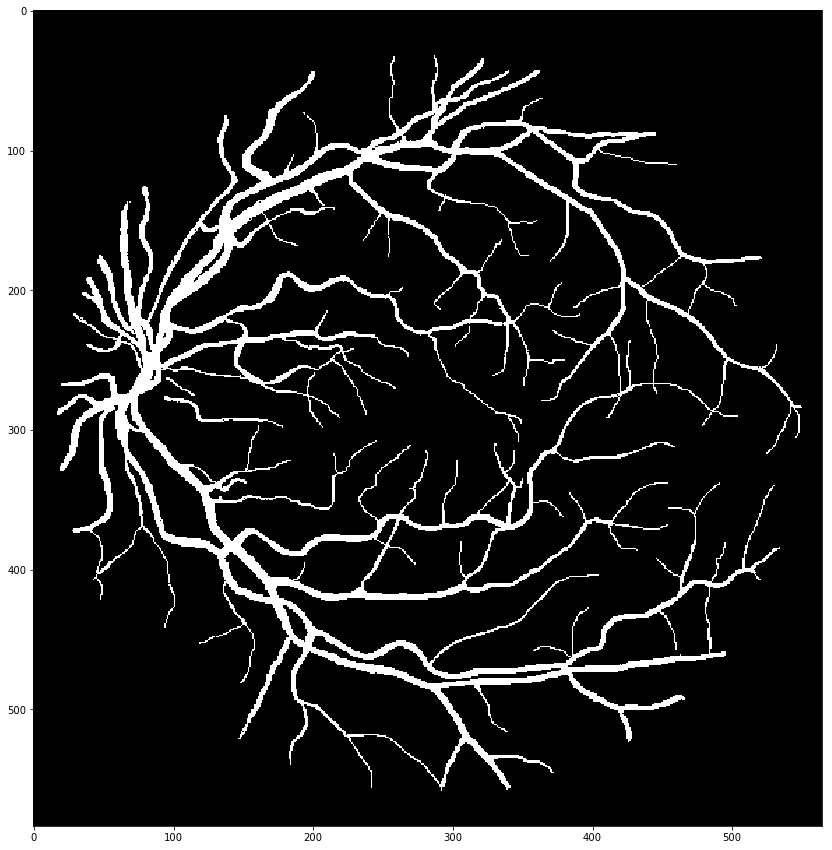

In [38]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
from matplotlib import pyplot as plt

#mypath='/path/to/folder'
mypath = 'drivemod/test/mask'
#mypath = 'drivemod/test/original'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(mypath,onlyfiles[n]), 0)


#type(images)
print(images.size)
print(images.shape)
im0 = images[4]
print(type(im0))
print(im0.shape)
plt.figure(figsize=(15, 15))
# plt.imshow(im0, cmap=plt.get_cmap('gray'))
# plt.show()

# data = np.zeros((len(images_mask), h, w), dtype=np.float64)
# target = np.zeros((len(images_mask), h, w), dtype=np.uint8)
    
inp_ves = np.zeros((20, 584, 565), dtype=np.uint8)

#images = np.expand_dims(images, 3)
inp_ves[0] = images[0]
inp_ves[1] = images[1]

inp_ves0 = inp_ves

inp_ves = np.expand_dims(inp_ves, 3)
print(type(inp_ves))
print(inp_ves.shape)

plt.figure(figsize=(15, 15))
inp0 = inp_ves[0,:,:,:]
inp0 = inp0.reshape(584, 565)
print(inp0.shape)
plt.imshow(inp0, cmap=plt.get_cmap('gray'))
plt.show()

In [31]:
import random

def random_crop(inputs, targets, num_targets=1, width=128, height=128):
    "Create random crop from an image and its targets"
    #inputs = numpy array of shape [row, col]
    #targets = numpy array of targets [row, col] or [row, col][row, col]
    #num_targets = number of targets
    #width = width of crop
    #height = height of crop
    row = inputs.shape[0]
    col = inputs.shape[1]

    blank = 1
    #while blank:
    x = random.randint(0, row-width-1)
    y = random.randint(0, col-height-1)

    input_crop = inputs[x:x+width, y:y+height]
    if num_targets == 1:
        target_crop = targets[x:x+width, y:y+height]
        if np.max(target_crop) == 1:
            blank = 0
    elif num_targets == 2:
        target1 = targets[0]
        target2 = targets[1]
        target1 = target1[x:x+width, y:y+height]
        target2 = target2[x:x+width, y:y+height]
        target_crop = [target1, target2]
        if np.max(target1) == 1 or np.max(target2) == 1:
            blank = 0
    return input_crop, target_crop

# def random_crop(inputs, targets, num_targets=1, width=128, height=128):
#     "Create random crop from an image and its targets"
#     #inputs = numpy array of shape [row, col]
#     #targets = numpy array of targets [row, col] or [row, col][row, col]
#     #num_targets = number of targets
#     #width = width of crop
#     #height = height of crop
#     row = inputs.shape[0]
#     col = inputs.shape[1]

#     blank = 1
#     while blank:
#         x = random.randint(0, row-width-1)
#         y = random.randint(0, col-height-1)

#         input_crop = inputs[x:x+width, y:y+height]
#         if num_targets == 1:
#             target_crop = targets[x:x+width, y:y+height]
#             if np.max(target_crop) == 1:
#                 blank = 0
#         elif num_targets == 2:
#             target1 = targets[0]
#             target2 = targets[1]
#             target1 = target1[x:x+width, y:y+height]
#             target2 = target2[x:x+width, y:y+height]
#             target_crop = [target1, target2]
#             if np.max(target1) == 1 or np.max(target2) == 1:
#                 blank = 0
#     return input_crop, target_crop

(20L, 584L, 565L)
(128L, 128L)


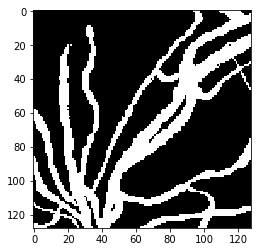

In [79]:
inp_ves1 = inp_ves0
print(inp_ves0.shape)

n = 0
inp_cr, seg_cr = random_crop(inp_ves0[n,:,:], inp_ves1[n,:,:], 1, 128, 128)

print(inp_cr.shape)
plt.imshow(inp_cr, cmap=plt.get_cmap('gray'))
#plt.show(inp_cr)

<type 'numpy.ndarray'>


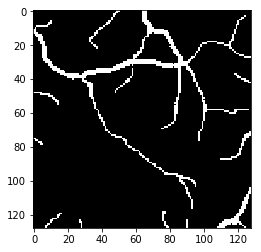

In [71]:
print(type(inp_cr))
plt.imshow(inp_cr, cmap=plt.get_cmap('gray'))

## /aside |||||||||||||||||||||||||||||||||||||||||||||

## cleaner:

In [191]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
from matplotlib import pyplot as plt

#mypath='/path/to/folder'
mypath1 = 'drivemod/test/original'
mypath2 = 'drivemod/test/mask'


def load_files(mypath):
    onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
    images = numpy.empty(len(onlyfiles), dtype=object)
    for n in range(0, len(onlyfiles)):
      images[n] = cv2.imread( join(mypath,onlyfiles[n]), 0)
    return images


inp_load0 = load_files(mypath1)
seg_load0 = load_files(mypath2)

images = inp_load0

n, hv, wv = 20, 584, 565
inp_load1 = np.zeros((n, hv, wv), dtype=np.float64)
seg_load1 = np.zeros((n, hv, wv), dtype=np.uint8)

for i in range(0, inp_load0.size):
    inp_load1[i] = inp_load0[i]           #(20L, 584L, 565L)
    seg_load1[i] = seg_load0[i]

    
inp_load = inp_load1
seg_load = seg_load1
    
# inp_load = np.expand_dims(inp_load1, 3)   #(20L, 584L, 565L, 1L)
# seg_load = np.expand_dims(seg_load1, 3)

print('inp_load', inp_load.shape)

#inp_load[0] = inp_load1[0]
#print(inp_load.shape)

def plot_ves_loads(sample, plot):

    inp = inp_load[sample]
    inp = inp.reshape(hv, wv)

    seg = seg_load[sample]
    seg = seg.reshape(hv, wv)

    if plot == 0:
        plt.figure(figsize=(15, 15))
        plt.imshow(inp, cmap=plt.get_cmap('gray'))
        plt.axis('off')
    
    if plot == 1:
        plt.figure(figsize=(15, 15))
        plt.imshow(seg, cmap=plt.get_cmap('gray'))
        plt.axis('off')
    
    if plot == 2:
        plt.figure(figsize=(15, 15))
        plt.subplot(1,2,1)
        plt.imshow(inp, cmap=plt.get_cmap('gray'))
        plt.subplot(1,2,2)
        plt.imshow(seg, cmap=plt.get_cmap('gray'))
        plt.axis('off')
        
    if plot == 3:
        plt.figure(figsize=(30, 30))
        plt.subplot(2,1,1)
        plt.imshow(inp, cmap=plt.get_cmap('gray'))
        plt.subplot(2,1,2)
        plt.imshow(seg, cmap=plt.get_cmap('gray'))
        plt.axis('off')
        
def plot_ves_crops(sample, plot):

    inp = inp_cr[sample]
    inp = inp.reshape(hc, wc)

    seg = seg_cr[sample]
    seg = seg.reshape(hc, wc)

    if plot == 0:
        plt.figure(figsize=(15, 15))
        plt.imshow(inp, cmap=plt.get_cmap('gray'))
        plt.axis('off')
    
    if plot == 1:
        plt.figure(figsize=(15, 15))
        plt.imshow(seg, cmap=plt.get_cmap('gray'))
        plt.axis('off')
    
    if plot == 2:
        plt.figure(figsize=(15, 15))
        plt.subplot(1,2,1)
        plt.imshow(inp, cmap=plt.get_cmap('gray'))
        plt.subplot(1,2,2)
        plt.imshow(seg, cmap=plt.get_cmap('gray'))
        plt.axis('off')
        
    if plot == 3:
        plt.figure(figsize=(30, 30))
        plt.subplot(2,1,1)
        plt.imshow(inp, cmap=plt.get_cmap('gray'))
        plt.subplot(2,1,2)
        plt.imshow(seg, cmap=plt.get_cmap('gray'))
        plt.axis('off')

('inp_load', (20L, 584L, 565L))


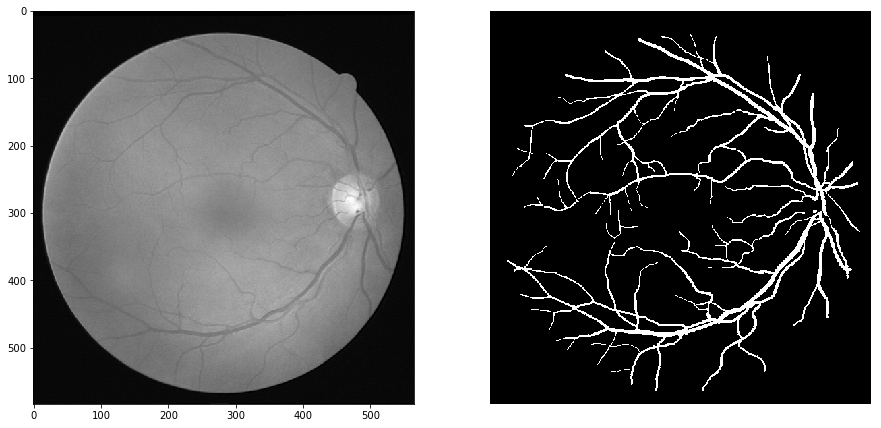

In [139]:
sample = 19
plot_ves_loads(sample, 2)

(20L, 584L, 565L)


(-0.5, 127.5, 127.5, -0.5)

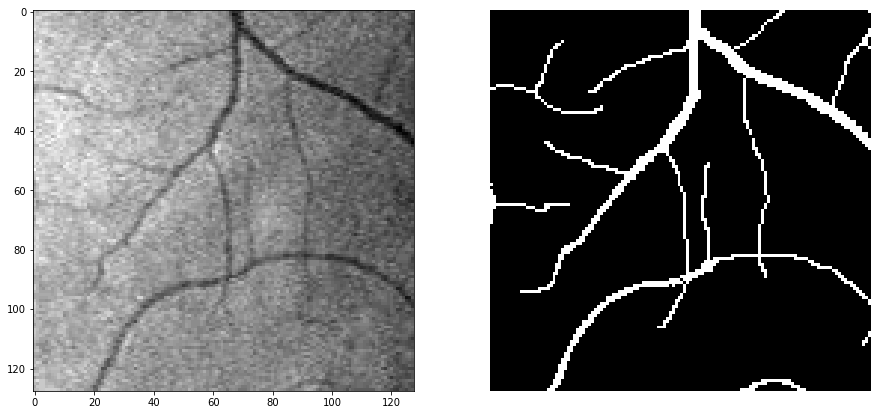

In [146]:
inp_ves1 = inp_ves0
print(inp_ves0.shape)

hc, wc, = 128, 128
n = 0
inp_cr, seg_cr = random_crop(inp_load[n,:,:], seg_load[n,:,:], 1, hc, wc)


plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.imshow(inp_cr, cmap=plt.get_cmap('gray'))
plt.subplot(1,2,2)
plt.imshow(seg_cr, cmap=plt.get_cmap('gray'))
plt.axis('off')

In [189]:
hc, wc, = 128, 128

def crop_set(numcrop, inp_load, seg_load, hc, wc):
    
    inp_cr = np.zeros((numcrop, hc, wc), dtype=np.float64)
    seg_cr = np.zeros((numcrop, hc, wc), dtype=np.uint8)

    for i in range(0, numcrop):
        n = random.randint(0, len(inp_load)-1)
        inp_cr0, seg_cr0 = random_crop(
            inp_load[n], 
            seg_load[n], 1, hc, wc)
        
        #print('inp_cr0', inp_cr0.shape)
        #print('i', i)
        inp_cr[i,:,:] = inp_cr0
        seg_cr[i,:,:] = seg_cr0
        
    return inp_cr, seg_cr

cropnum = 20
inp_cr, seg_cr = crop_set(cropnum, inp_load, seg_load, hc, wc)


print('inp_load', inp_load.shape)
print('inp_cr', inp_cr.shape)

('inp_load', (20L, 584L, 565L))
('inp_cr', (20L, 128L, 128L))


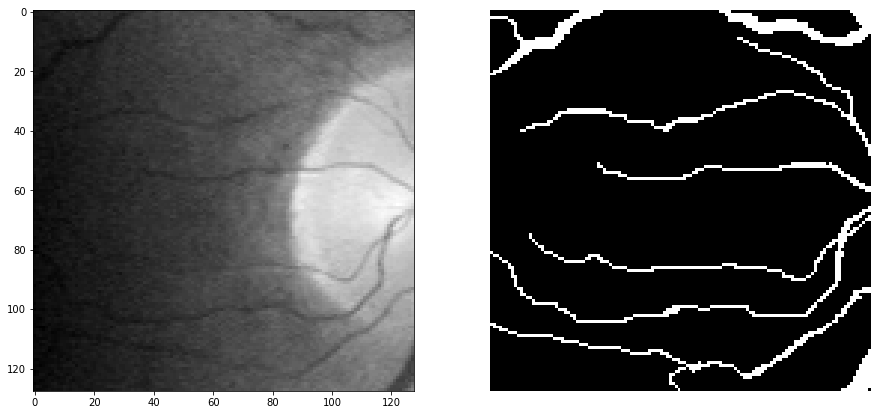

In [188]:
sample = 19
plot_ves_crops(sample, plot)

## /cleaner ||||||||

In [3]:

#loss
import theano.tensor as T
smooth = 1.

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


def cal_weights_4loss(y_true):
    #size = y_true.shape[1] * y_true.shape[0] #tf syntax
    size = y_true.shape[1] * y_true.shape[2]  #theano syntax
    percentage_back = 0.0
    percentage_fore = 0.0
    percentage_back = np.count_nonzero(y_true == 0)/size*100
    percentage_fore = np.count_nonzero(y_true == 1)/size*100
    weight_back = np.reciprocal(percentage_back)
    weight_fore = np.reciprocal(percentage_fore)
    #print(percentage_back, percentage_fore)
    return percentage_back, percentage_fore


def weighted_crossentropy_coeff(y_true, y_pred):
#     y_true = T.transpose(y_true, (0,2,3,1))
#     y_pred = T.transpose(y_pred, (0,2,3,1))
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    weights = y_true * class_weights[0] 
    temp = T.eq(y_true, 0)
    temp = T.cast(temp, 'float32')
    temp = temp * class_weights[1]
    weights = weights + temp

    epsilon = 10e-8
    y_true = T.clip(y_true, epsilon, 1. - epsilon)
    coeff = K.sum(((y_true * K.log(y_pred))*weights))
    return coeff


def weighted_crossentropy_loss(y_true, y_pred):
    return -weighted_crossentropy_coeff(y_true, y_pred)


weight_back = np.zeros((y_test.shape[0]))
weight_fore = np.zeros((y_test.shape[0]))

# print(y_test.shape)
# print(weight_back.shape)

for i in np.arange(y_test.shape[0]):
    weight_back[i], weight_fore[i] = cal_weights_4loss(y_test[i])

loss_back = np.mean(weight_back)
loss_fore = np.mean(weight_fore)

ratio = loss_back/loss_fore
    
#class_weights = [1.5, 1.5/ratio]
class_weights = [0.8, 0.2]
print(loss_back, loss_fore, ratio, class_weights)


(2700.0, 0.0, inf, [0.8, 0.2])


In [4]:
w, h = 28, 28
inputs = Input((w, h, 1))
net_num = '1'
batch_num = 8
epoch_num = 15
thresh = 0.65
threshon = 0
sample = 0
#thresh = 0.5
loss_type  = 'weihgted'

def train_model(net_num, get_unet0, batch_num, epoch_num, indcoef):

    checkpath = 'checkpoints/unet_' + net_num + '.best.h5'
    modelpath = 'models/unet_' + net_num + '.h5'
    weightpath = 'weights/unet_' + net_num + '.h5'

    model = get_unet0(Input((w,h,1)), indcoef)
    #print(type(model))
    #checkpoint = ModelCheckpoint(checkpath, monitor='val_loss', save_best_only=True)
    
    history = model.fit(x_train, y_train,
          batch_size=batch_num, epochs=epoch_num, 
          verbose=1, shuffle=True,
          validation_split=0.2, 
     #     callbacks=[checkpoint]
         )

    model.save(modelpath)
    model.save_weights(weightpath)
    
    #plot_history(history, indcoef)
    
    return model, history


def compiler_loss(indcoef):

    #if indcoef == 0:
    if indcoef == 'binary':
        #typecoeff = 'acc'
        typecoeff = 'binary_crossentropy'
        valcoeff = 'accuracy'
    
    #if indcoef == 1:
    if indcoef == 'dice':
        typecoeff = 'dice_coef'
        valcoeff = 'val_dice_coef'
        
    #if indcoef == 2:
    if indcoef == 'weighted':
        typecoeff = weighted_crossentropy_loss
        valcoeff = weighted_crossentropy_coeff
        
    return typecoeff, valcoeff

        
def plot_history(history, indcoef):
    
    #if indcoef == 0:
    if indcoef == 'binary':
        typecoeff = 'acc'
        valcoeff = 'val_acc'
    
    #if indcoef == 1:
    if indcoef == 'dice':
        typecoeff = 'dice_coef'
        valcoeff = 'val_dice_coef'
        
    #if indcoef == 2:
    if indcoef == 'weighted':
        typecoeff = 'weighted_crossentropy_coeff'
        valcoeff = 'val_weighted_crossentropy_coeff'
        
#     typecoeff = choose_loss(indcoef)[0]
#     valcoeff = choose_loss(indcoef)[1]
           
    # summarize history for accuracy
    plt.plot(history.history[typecoeff])
    plt.plot(history.history[valcoeff])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    
def predict(model, x_test):
    pred = model.predict(x_test, verbose=1)
    return pred
    
    
def plot_preds0(pred, x_test, sample, thresh, threshon):  
    test = x_test[sample,:,:,:].reshape(w,h)
    
    if threshon == 0:
        thresh = (np.max(test) - np.min(test))/2
    
    print('threshold:', thresh, 'usage:', threshon)
    print('min and max predicted values:',np.min(test), np.max(test))
    plt.imshow(test>thresh, cmap=plt.get_cmap('gray'))
    plt.tight_layout()
    plt.title('Prediction')
    plt.axis('off')
    plt.show()

    plt.imshow(y_test[sample,:,:,:].reshape(w,h), cmap=plt.get_cmap('gray'))
    plt.tight_layout()
    plt.title('Target')
    plt.axis('off')
    plt.show()

    plt.imshow(x_test[sample,:,:,:].reshape(w,h), cmap=plt.get_cmap('gray'))
    plt.tight_layout()
    plt.title('Original')
    plt.axis('off')
    plt.show()
    
    
def plot_preds(pred, x_test, y_test, sample, thresh, threshon):  
    print(pred.shape)   # (20L, 28L, 28L, 1L)
    #test = #x_test[sample,:,:,:].reshape(w,h)
    test = pred[sample,:,:,:]
    print(test.shape)
    test2 = test.reshape(w,h)
    print(test2.shape)

#     if threshon == 0:
#         thresh = (np.max(test) - np.min(test))/2

    print('threshold:', thresh, 'usage:', threshon)
    print('min and max predicted values:',np.min(test), np.max(test))
    #plt.imshow(test2>thresh, cmap=plt.get_cmap('gray'))
    if threshon == 0:
        plt.imshow(test2, cmap=plt.get_cmap('gray'))
        title = 'Prediction'
    if threshon == 1:
        plt.imshow(test2>thresh, cmap=plt.get_cmap('gray'))
        title = 'Prediction Thresholded'
    plt.tight_layout()
    plt.title(title)
    plt.axis('off')
    plt.show()

    plt.imshow(y_test[sample,:,:,:].reshape(w,h), cmap=plt.get_cmap('gray'))
    plt.tight_layout()
    plt.title('Target')
    plt.axis('off')
    plt.show()

    plt.imshow(x_test[sample,:,:,:].reshape(w,h), cmap=plt.get_cmap('gray'))
    plt.tight_layout()
    plt.title('Original')
    plt.axis('off')
    plt.show()
    
def plot_preds_a(pred, x_test, y_test, sample, thresh, threshon):  
    print(pred.shape)   # (20L, 28L, 28L, 1L)
    #test = #x_test[sample,:,:,:].reshape(w,h)
    test = pred[sample,:,:,:]
    print(test.shape)
    test2 = test.reshape(w,h)
    print(test2.shape)

#     if threshon == 0:
#         thresh = (np.max(test) - np.min(test))/2

    print('threshold:', thresh, 'usage:', threshon)
    print('min and max predicted values:',np.min(test), np.max(test))
    #plt.imshow(test2>thresh, cmap=plt.get_cmap('gray'))
    if threshon == 0:
        plt.imshow(test2, cmap=plt.get_cmap('gray'))
        title = 'Prediction'
    if threshon == 1:
        plt.imshow(test2>thresh, cmap=plt.get_cmap('gray'))
        title = 'Prediction Thresholded'
    plt.tight_layout()
    plt.title(title)
    plt.axis('off')
    plt.show()

    alpha1 = 0.2
    #overlay1 = test2 * (1 - alpha1) + y_test[sample,:,:,:].reshape(w,h) * alpha1
    overlay1 = test2 + y_test[sample,:,:,:].reshape(w,h) * alpha1
    #overlay1 = test2 * [1,0,0] + (y_test[sample,:,:,:].reshape(w,h) * alpha1 * [0,1,1])
    plt.imshow(overlay1, cmap=plt.get_cmap('gray'))
    #plt.imshow(overlay1)
    plt.tight_layout()
    plt.title('Prediction with Target ')
    plt.axis('off')
    plt.show()

    alpha2 = 0.5
    overlay2 = x_test[sample,:,:,:].reshape(w,h) * (1.7 - alpha2) + y_test[sample,:,:,:].reshape(w,h) * alpha2
    plt.imshow(overlay2, cmap=plt.get_cmap('gray'))
    plt.tight_layout()
    plt.title('Original with Target')
    plt.axis('off')
    plt.show()
    
def print_scores():
    num_test = (X_test.shape[0])
    test_score = np.zeros(num_test)

    for i in np.arange(num_test):
        mask = imgs_mask_test[i]
        test_score[i] = np.sum(y_test[i]-mask)
    mean_score = np.mean(test_score)
    print('test scores:', test_score)
    print('mean test score:', mean_score)


In [ ]:
def get_seg(inputs, lossind):
#def get_unet1v3(inputs, lossind):

    inputs = Input((w, h, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv1)
    up1 = concatenate([UpSampling2D(size=(2, 2))(pool1), conv1], axis=-1)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    
    conv3 = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='conv6')(conv1)
    
    model = Model(inputs=[inputs], outputs=[conv3])

   # model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss, metrics=[dice_coef])
    model.compile(optimizer=Adam(lr=1e-5), loss=compiler_loss(lossind)[0], metrics=[compiler_loss(lossind)[1]])#/, sample_weight_mode="temporal")
    
    return model


In [53]:
def get_bif(inputs, lossind):
#def get_unet2v1(inputs, lossind):

    inputs = Input((w, h, 1))
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv1)

    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv2)

    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv3)
    
    up4 = concatenate([UpSampling2D(size=(2, 2))(conv3), conv2], axis=3)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up4)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4)

    up5 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv1], axis=3)
    conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(up5)
    conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)
   
    conv6 = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='conv6')(conv5)
    
    model = Model(inputs=[inputs], outputs=[conv6])

   # model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss, metrics=[dice_coef])
    model.compile(optimizer=Adam(lr=1e-5), loss=compiler_loss(lossind)[0], metrics=[compiler_loss(lossind)[1]])#/, sample_weight_mode="temporal")
    
    return model

In [64]:
def get_unet3v1(inputs, lossind):

    inputs = Input((w, h, 1))
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
    #conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
    trunkout = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv1)

   
    #segmentatiom branch
    seg1 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(trunkout)
    up1 = concatenate([UpSampling2D(size=(2, 2))(seg1), trunkout], axis=-1)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
    
    segout = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='conv6')(conv1)
    
    

    #detection branch
    
    det1 = Conv2D(32, (3, 3), activation='relu', padding='same')(trunkout)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(det1)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv2)
    
    det1 = Conv2D(64, (3, 3), activation='relu', padding='same')(trunkout)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(det1)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv3)
    
    up4 = concatenate([UpSampling2D(size=(2, 2))(conv3), conv2], axis=3)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up4)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4)

    up5 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv1], axis=3) #//
    conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(up5)
    conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)
   
    detout = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='conv6')(conv5)
    

    model = Model(inputs=[inputs], outputs=[segout, detout])

   # model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss, metrics=[dice_coef])
    model.compile(optimizer=Adam(lr=1e-5), loss=compiler_loss(lossind)[0], metrics=[compiler_loss(lossind)[1]])#/, sample_weight_mode="temporal")
    
    return model

In [65]:
def train_model2(net_num, get_unet0, batch_num, epoch_num, indcoef):

    checkpath = 'checkpoints/unet_' + net_num + '.best.h5'
    modelpath = 'models/unet_' + net_num + '.h5'
    weightpath = 'weights/unet_' + net_num + '.h5'

    model = get_unet0(Input((w,h,1)), indcoef)
    #print(type(model))
    #checkpoint = ModelCheckpoint(checkpath, monitor='val_loss', save_best_only=True)
    
    history = model.fit(inp_train, [seg_train, det_train],
          batch_size=batch_num, epochs=epoch_num, 
          verbose=1, shuffle=True,
          validation_split=0.2, 
     #     callbacks=[checkpoint]
         )

    model.save(modelpath)
    model.save_weights(weightpath)
    
    #plot_history(history, indcoef)
    
    return model, history

In [67]:
loss_type = 'binary'
model_3v1, history = train_model2('3v1', get_unet3v1, 8, 15, loss_type)

pred3v1 = predict(model_3v1, x_test_20)

ValueError: Error when checking target: expected conv2d_141 to have shape (None, 7, 7, 64) but got array with shape (540L, 28L, 28L, 1L)

In [5]:
def get_unet3v1_1(inputs, lossind):  # segmentation only
    
    inputs = Input((w, h, 1))
    
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv1)
    #pool1 = common
    
    up1 = concatenate([UpSampling2D(size=(2, 2))(pool1), conv1], axis=-1)
    conv02 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv02 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv02)
    
    conv3 = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='conv6')(conv1)
    
# #     model = Model(inputs=[inputs], outputs=[conv3])
    
    
    
# #     conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
# #     conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
# #     conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
# #     pool1 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv1)

#     conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
#     conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
#     conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
#     pool2 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv2)

#     conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool2)
#     conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
#     conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
#     pool3 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv3)
    
#     up4 = concatenate([UpSampling2D(size=(2, 2))(conv3), conv2], axis=3)
#     conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up4)
#     conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4)
#     conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4)

#     up5 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv1], axis=3)
#     conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(up5)
#     conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)
#     conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)
   
#     conv6 = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='conv6')(conv5)
    
    model = Model(inputs=[inputs], outputs=[conv3])

#     model = Model(inputs=[inputs], outputs=[conv3, conv6])
    model.compile(optimizer=Adam(lr=1e-5), loss=compiler_loss(lossind)[0], metrics=[compiler_loss(lossind)[1]])#/, sample_weight_mode="temporal")
    
    
    return model

In [6]:
def get_unet3v1_2(inputs, lossind):  # detection only
    
    inputs = Input((w, h, 1))
    
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv1)
    #pool1 = common
    
#     up1 = concatenate([UpSampling2D(size=(2, 2))(pool1), conv1], axis=-1)
#     conv02 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
#     conv02 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv02)
    
#     conv3 = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='conv6')(conv1)
    
#     model = Model(inputs=[inputs], outputs=[conv3])
    
    
    
#     conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
#     conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
#     conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv1)

    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv2)

    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv3)
    
    up4 = concatenate([UpSampling2D(size=(2, 2))(conv3), conv2], axis=3)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up4)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4)

    up5 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv1], axis=3)
    conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(up5)
    conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)
   
    conv6 = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='conv6')(conv5)
    
    model = Model(inputs=[inputs], outputs=[conv6])

#     model = Model(inputs=[inputs], outputs=[conv3, conv6])
    model.compile(optimizer=Adam(lr=1e-5), loss=compiler_loss(lossind)[0], metrics=[compiler_loss(lossind)[1]])#/, sample_weight_mode="temporal")
    
    
    return model

In [22]:
def get_unet3v1_3(inputs, lossind):
    
    inputs = Input((w, h, 1))
    
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv1)
    #pool1 = common
    
    up1 = concatenate([UpSampling2D(size=(2, 2))(pool1), conv1], axis=-1)
    conv02 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv02 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv02)
    
    conv3 = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='conv6')(conv1)
    
#     model = Model(inputs=[inputs], outputs=[conv3])
    
    
    
#     conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
#     conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
#     conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv1)

    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv2)

    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv3)
    
    up4 = concatenate([UpSampling2D(size=(2, 2))(conv3), conv2], axis=3)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up4)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4)

    up5 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv1], axis=3)
    conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(up5)
    conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)
   
    conv6 = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='conv6')(conv5)
    
#     model = Model(inputs=[inputs], outputs=[conv6])

    model = Model(inputs=[inputs], outputs=[conv3, conv6])
    model.compile(optimizer=Adam(lr=1e-5), loss=compiler_loss(lossind)[0], metrics=[compiler_loss(lossind)[1]])#/, sample_weight_mode="temporal")
    
    
    return model

## train_model with ground truth input

In [5]:
def train_model(net_num, get_unet0, y_truth, batch_num, epoch_num, indcoef):

    model = get_unet0(Input((w,h,1)), indcoef)
    #print(type(model))
    #checkpoint = ModelCheckpoint(checkpath, monitor='val_loss', save_best_only=True)
    
    history = model.fit(inp_train, y_truth,
          batch_size=batch_num, epochs=epoch_num, 
          verbose=1, shuffle=True,
          validation_split=0.2, 
     #     callbacks=[checkpoint]
         )

#     model.save(modelpath)
#     model.save_weights(weightpath)
    
    #plot_history(history, indcoef)
    
    return model, history

In [43]:
loss_type = 'binary'
model_3v1_1, history = train_model('3v1_1', get_unet3v1_1, seg_train, 8, 15, loss_type)

pred3v1_1 = predict(model_3v1_1, x_test_20)

Train on 432 samples, validate on 108 samples
Epoch 1/15
432/432 [==============================] - 0s - loss: 0.6685 - acc: 0.8478 - val_loss: 0.6661 - val_acc: 0.8239
Epoch 2/15
432/432 [==============================] - 0s - loss: 0.6603 - acc: 0.8494 - val_loss: 0.6581 - val_acc: 0.8260
Epoch 3/15
432/432 [==============================] - 0s - loss: 0.6516 - acc: 0.8519 - val_loss: 0.6499 - val_acc: 0.8277
Epoch 4/15
432/432 [==============================] - 0s - loss: 0.6425 - acc: 0.8524 - val_loss: 0.6412 - val_acc: 0.8277
Epoch 5/15
432/432 [==============================] - 0s - loss: 0.6328 - acc: 0.8524 - val_loss: 0.6317 - val_acc: 0.8277
Epoch 6/15
432/432 [==============================] - 1s - loss: 0.6221 - acc: 0.8524 - val_loss: 0.6214 - val_acc: 0.8277
Epoch 7/15
432/432 [==============================] - 1s - loss: 0.6107 - acc: 0.8524 - val_loss: 0.6105 - val_acc: 0.8277
Epoch 8/15
432/432 [==============================] - 0s - loss: 0.5986 - acc: 0.8524 - val_l

In [28]:
sample = 0;
plot_preds(pred3v1_1, inp_test, seg_test, sample, thresh, 0)

NameError: name 'pred3v1_1' is not defined

In [19]:
loss_type = 'binary'
model_3v1_1w2, history = train_model('3v1_1w2', get_unet3v1_1, seg_train, 8, 10, loss_type)

pred3v1_1w2 = predict(model_3v1_1w2, x_test_20)

Train on 432 samples, validate on 108 samples
Epoch 1/10
432/432 [==============================] - 0s - loss: 0.7040 - acc: 0.1805 - val_loss: 0.6992 - val_acc: 0.2512
Epoch 2/10
432/432 [==============================] - 0s - loss: 0.6960 - acc: 0.3542 - val_loss: 0.6917 - val_acc: 0.5724
Epoch 3/10
432/432 [==============================] - 0s - loss: 0.6881 - acc: 0.7506 - val_loss: 0.6846 - val_acc: 0.7865
Epoch 4/10
432/432 [==============================] - 0s - loss: 0.6806 - acc: 0.8184 - val_loss: 0.6778 - val_acc: 0.8048
Epoch 5/10
432/432 [==============================] - 0s - loss: 0.6738 - acc: 0.8446 - val_loss: 0.6719 - val_acc: 0.8276
Epoch 6/10
432/432 [==============================] - 0s - loss: 0.6679 - acc: 0.8524 - val_loss: 0.6667 - val_acc: 0.8277
Epoch 7/10
432/432 [==============================] - 0s - loss: 0.6623 - acc: 0.8524 - val_loss: 0.6615 - val_acc: 0.8277
Epoch 8/10
432/432 [==============================] - 0s - loss: 0.6568 - acc: 0.8524 - val_l

(20L, 28L, 28L, 1L)
(28L, 28L, 1L)
(28L, 28L)
threshold: 0.65 usage: 0
min and max predicted values: 0.445512 0.492791


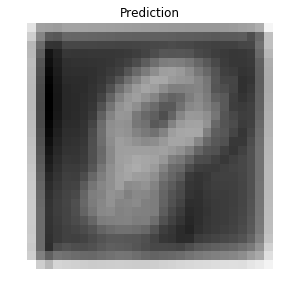

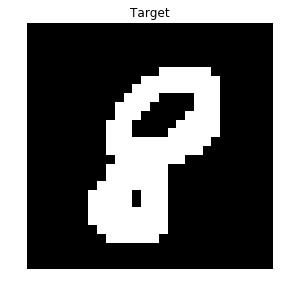

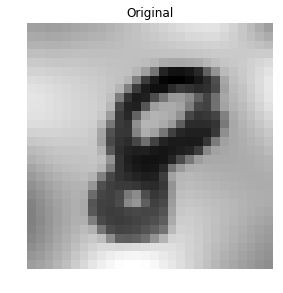

In [20]:
sample = 0
plot_preds(pred3v1_1w2, inp_test, seg_test, sample, thresh, 0)

In [24]:
loss_type = 'binary'
model_3v1_2w2, history = train_model('3v1_2w2', get_unet3v1_2, seg_train, 8, 10, loss_type)

pred3v1_2w2 = predict(model_3v1_2w2, x_test_20)

Train on 432 samples, validate on 108 samples
Epoch 1/10
432/432 [==============================] - 4s - loss: 0.6856 - acc: 0.8488 - val_loss: 0.6835 - val_acc: 0.8256
Epoch 2/10
432/432 [==============================] - 3s - loss: 0.6787 - acc: 0.8503 - val_loss: 0.6748 - val_acc: 0.8254
Epoch 3/10
432/432 [==============================] - 4s - loss: 0.6642 - acc: 0.8502 - val_loss: 0.6545 - val_acc: 0.8253
Epoch 4/10
432/432 [==============================] - 3s - loss: 0.6148 - acc: 0.8499 - val_loss: 0.5833 - val_acc: 0.8251
Epoch 5/10
432/432 [==============================] - 3s - loss: 0.5395 - acc: 0.8498 - val_loss: 0.5626 - val_acc: 0.8252
Epoch 6/10
432/432 [==============================] - 4s - loss: 0.5188 - acc: 0.8501 - val_loss: 0.5448 - val_acc: 0.8262
Epoch 7/10
432/432 [==============================] - 3s - loss: 0.4992 - acc: 0.8511 - val_loss: 0.5229 - val_acc: 0.8264
Epoch 8/10
432/432 [==============================] - 4s - loss: 0.4717 - acc: 0.8511 - val_l

(20L, 28L, 28L, 1L)
(28L, 28L, 1L)
(28L, 28L)
threshold: 0.65 usage: 0
min and max predicted values: 0.007653 0.527115


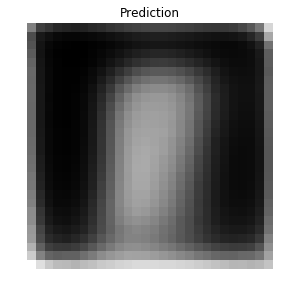

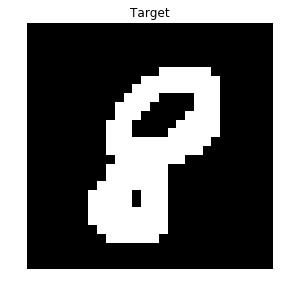

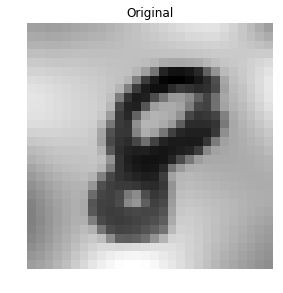

In [25]:
sample = 0
plot_preds(pred3v1_2w2, inp_test, seg_test, sample, thresh, 0)

Train on 432 samples, validate on 108 samples
Epoch 1/5
432/432 [==============================] - 6s - loss: 0.7469 - acc: 0.0332 - val_loss: 0.7348 - val_acc: 0.0332
Epoch 2/5
432/432 [==============================] - 6s - loss: 0.7243 - acc: 0.0347 - val_loss: 0.7113 - val_acc: 0.0383
Epoch 3/5
432/432 [==============================] - 6s - loss: 0.6974 - acc: 0.3589 - val_loss: 0.6836 - val_acc: 0.8713
Epoch 4/5
432/432 [==============================] - 6s - loss: 0.6688 - acc: 0.9488 - val_loss: 0.6468 - val_acc: 0.9675
Epoch 5/5
20/20 [==============================] - 0s
(20L, 28L, 28L, 1L)
(28L, 28L, 1L)
(28L, 28L)
threshold: 0.65 usage: 0
min and max predicted values: 0.210938 0.501592


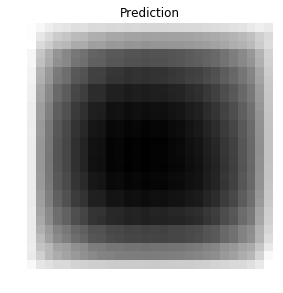

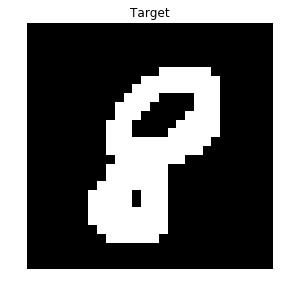

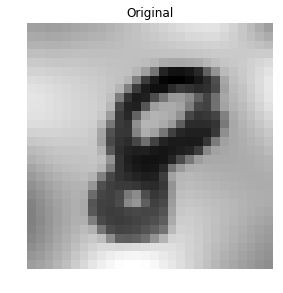

In [30]:
loss_type = 'binary'
model_3v1_2w2, history = train_model('3v1_2w2', get_unet3v1_2, det_train, 8, 5, loss_type)

pred3v1_2w2 = predict(model_3v1_2w2, x_test_20)
plot_preds(pred3v1_2w2, inp_test, seg_test, sample, thresh, 0)

In [ ]:
loss_type = 'binary'
model_3v1_2w2, history = train_model('3v1_2w2', get_unet3v1_2, det_train, 8, 15, loss_type)

pred3v1_2w2 = predict(model_3v1_2w2, x_test_20)
plot_preds(pred3v1_2w2, inp_test, seg_test, sample, thresh, 0)

Train on 432 samples, validate on 108 samples
Epoch 1/15
432/432 [==============================] - 3s - loss: 0.7016 - acc: 0.0417 - val_loss: 0.6962 - val_acc: 0.1434
Epoch 2/15
432/432 [==============================] - 3s - loss: 0.6847 - acc: 0.7491 - val_loss: 0.6682 - val_acc: 0.9604
Epoch 3/15
432/432 [==============================] - 3s - loss: 0.6249 - acc: 0.9665 - val_loss: 0.5488 - val_acc: 0.9681
Epoch 4/15
432/432 [==============================] - 3s - loss: 0.4056 - acc: 0.9681 - val_loss: 0.2916 - val_acc: 0.9681
Epoch 5/15
432/432 [==============================] - 4s - loss: 0.2773 - acc: 0.9681 - val_loss: 0.2680 - val_acc: 0.9681
Epoch 6/15
432/432 [==============================] - 4s - loss: 0.2610 - acc: 0.9681 - val_loss: 0.2532 - val_acc: 0.9681
Epoch 7/15
432/432 [==============================] - 4s - loss: 0.2451 - acc: 0.9681 - val_loss: 0.2351 - val_acc: 0.9681
Epoch 8/15
432/432 [==============================] - 4s - loss: 0.2250 - acc: 0.9681 - val_l

In [45]:
loss_type = 'binary'
model_3v1_2, history = train_model('3v1_2', get_unet3v1_2, det_train, 8, 15, loss_type)

pred3v1_2 = predict(model_3v1_2, x_test_20)

Train on 432 samples, validate on 108 samples
Epoch 1/15
432/432 [==============================] - 5s - loss: 0.6854 - acc: 0.9168 - val_loss: 0.6774 - val_acc: 0.9417
Epoch 2/15
432/432 [==============================] - 5s - loss: 0.6665 - acc: 0.9645 - val_loss: 0.6532 - val_acc: 0.9668
Epoch 3/15
432/432 [==============================] - 5s - loss: 0.6245 - acc: 0.9676 - val_loss: 0.5770 - val_acc: 0.9681
Epoch 4/15
432/432 [==============================] - 5s - loss: 0.4579 - acc: 0.9681 - val_loss: 0.3119 - val_acc: 0.9681
Epoch 5/15
432/432 [==============================] - 5s - loss: 0.2700 - acc: 0.9681 - val_loss: 0.2553 - val_acc: 0.9681
Epoch 6/15
432/432 [==============================] - 5s - loss: 0.2498 - acc: 0.9681 - val_loss: 0.2411 - val_acc: 0.9681
Epoch 7/15
432/432 [==============================] - 5s - loss: 0.2347 - acc: 0.9681 - val_loss: 0.2252 - val_acc: 0.9681
Epoch 8/15
432/432 [==============================] - 5s - loss: 0.2184 - acc: 0.9681 - val_l

(20L, 28L, 28L, 1L)
(28L, 28L, 1L)
(28L, 28L)
('threshold:', 0.65, 'usage:', 0)
('min and max predicted values:', 2.9045029e-07, 0.32872251)


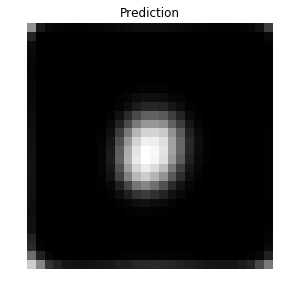

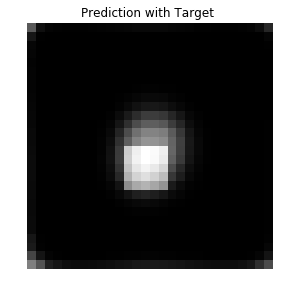

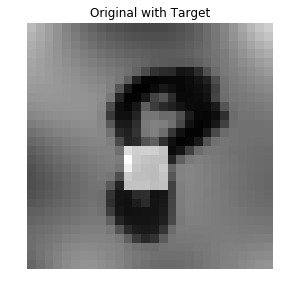

In [46]:
sample = 2;
plot_preds_a(pred3v1_2, inp_test, det_test, sample, thresh, 0)

In [52]:
def train_model_2(net_num, get_unet0, [y1_truth, y2_truth], batch_num, epoch_num, indcoef):

    model = get_unet0(Input((w,h,1)), indcoef)
    #print(type(model))
    #checkpoint = ModelCheckpoint(checkpath, monitor='val_loss', save_best_only=True)
    
    history = model.fit(inp_train, [y1_truth, y2_truth],
          batch_size=batch_num, epochs=epoch_num, 
          verbose=1, shuffle=True,
    #      validation_split=0.2, 
     #     callbacks=[checkpoint]
         )

#     model.save(modelpath)
#     model.save_weights(weightpath)
    
    #plot_history(history, indcoef)
    
    return model, history

SyntaxError: invalid syntax (<ipython-input-52-dddc33926e14>, line 1)

In [53]:
loss_type = 'binary'
model_3v1_1, history = train_model('3v1_1', get_unet3v1_1, [seg_train, det_train], 8, 15, loss_type)

pred3v1_1 = predict(model_3v1_1, x_test_20)

ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 arrays but instead got the following list of 2 arrays: [array([[[[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]]...

In [56]:
indcoef = 'binary'
model_3v1_3 = get_unet3v1_3(Input((w,h,1)), indcoef)
#print(type(model))
#checkpoint = ModelCheckpoint(checkpath, monitor='val_loss', save_best_only=True)

y1_truth = seg_train
y2_truth = det_train

history_3v1_3 = model_3v1_3.fit(inp_train, [y1_truth, y2_truth],
      batch_size=batch_num, epochs=epoch_num, 
      verbose=1, shuffle=True,
#      validation_split=0.2, 
 #     callbacks=[checkpoint]
     )

ValueError: Error when checking target: expected conv2d_76 to have shape (None, 7, 7, 64) but got array with shape (540L, 28L, 28L, 1L)